In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
tesla = pd.read_csv('TSLA.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-20,332.690002,333.100006,325.040009,328.980011,328.980011,5953800
1,2017-12-21,329.589996,333.739990,327.209991,331.660004,331.660004,4385200
2,2017-12-22,329.510010,330.920013,324.820007,325.200012,325.200012,4215800
3,2017-12-26,323.829987,323.940002,316.579987,317.290009,317.290009,4378400
4,2017-12-27,316.000000,317.679993,310.750000,311.640015,311.640015,4712100


/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


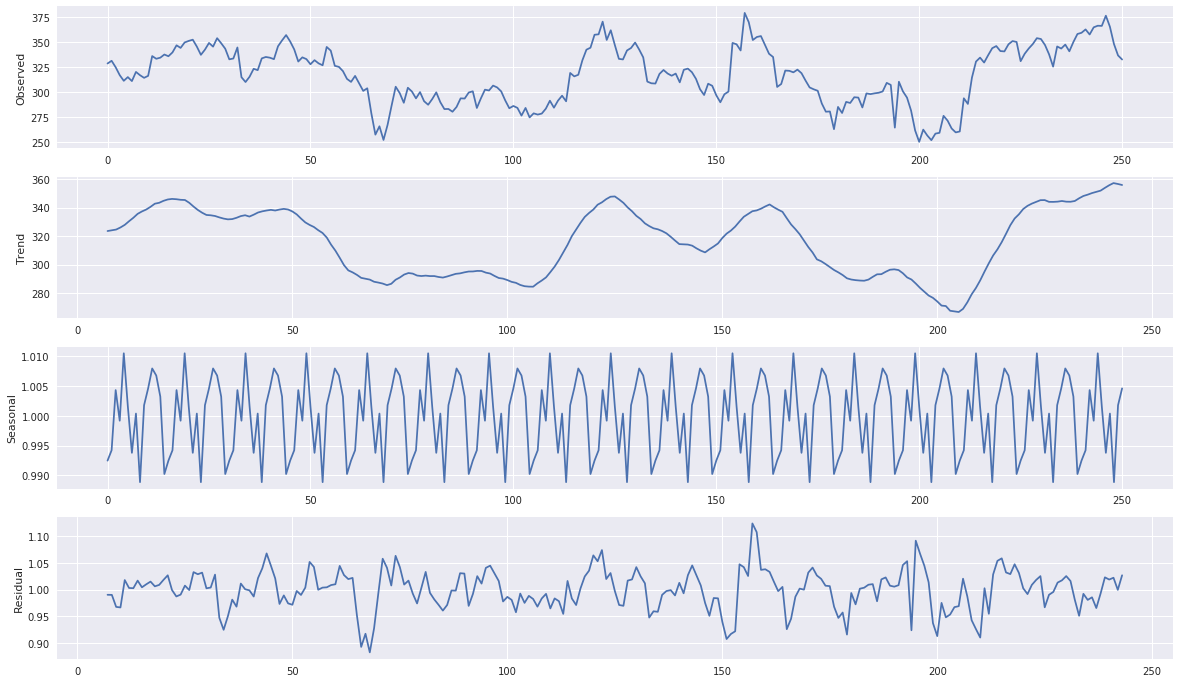

In [3]:
import statsmodels.api as sm

# multiplicative
freq = 15
signal = tesla.Close.values
res = sm.tsa.seasonal_decompose(signal, freq=freq, model="multiplicative")
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(20, 12))
ax1.plot(res.observed)
ax1.set_ylabel('Observed')
ax2.plot(res.trend)
ax2.set_ylabel('Trend')
ax3.plot(res.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(res.resid)
ax4.set_ylabel('Residual')
plt.show()

In [4]:
def removal(signal, repeat):
    copy_signal = np.copy(signal)
    for j in range(repeat):
        for i in range(3, len(signal)):
            copy_signal[i - 1] = (copy_signal[i - 2] + copy_signal[i]) / 2
    return copy_signal

def get(original_signal, removed_signal):
    buffer = []
    for i in range(len(removed_signal)):
        buffer.append(original_signal[i] - removed_signal[i])
    return np.array(buffer)

In [5]:
removed_signal = removal(signal, 30)
noise = get(signal, removed_signal)

## Residual

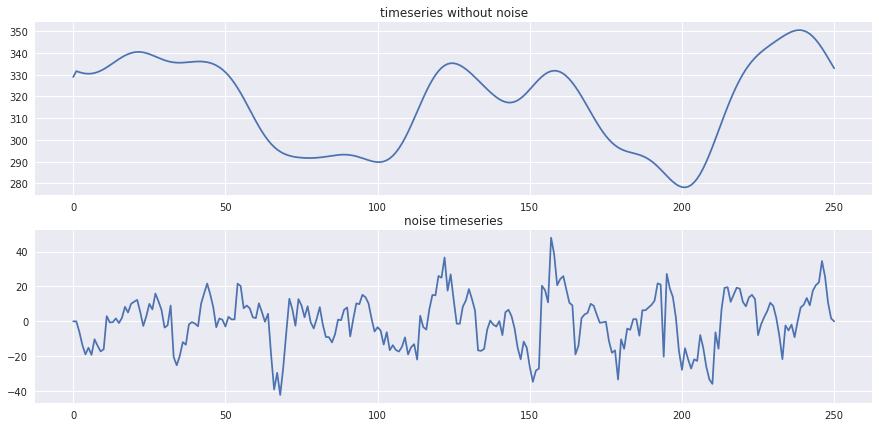

In [6]:
plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 1)
plt.plot(removed_signal)
plt.title('timeseries without noise')
plt.subplot(2, 1, 2)
plt.plot(noise)
plt.title('noise timeseries')
plt.show()

## Trend

In [7]:
kernel = np.array([1] * freq) / freq
kernel

array([0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667])

In [8]:
stride = 1
t_range = int((signal.shape[0] - freq) / stride + 1)
output_conv = np.zeros((t_range))
for i in range(t_range):
    sum_val = np.sum(signal[i * stride:i * stride + freq] * kernel)
    output_conv[i] = sum_val

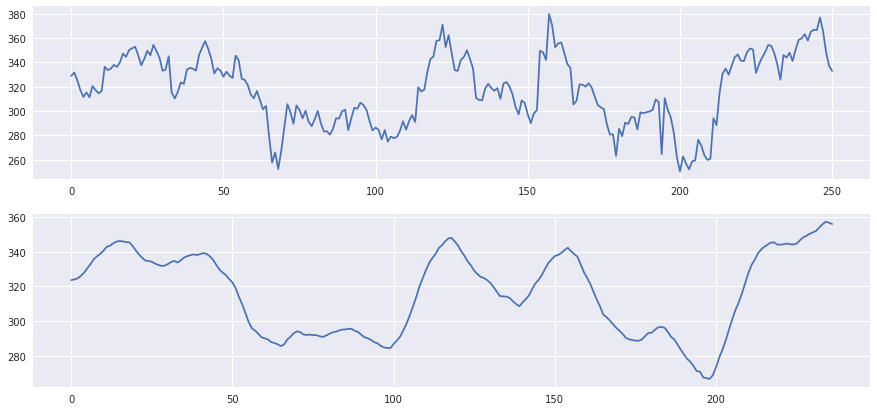

In [11]:
plt.figure(figsize=(15, 7))
plt.subplot(2,1,1)
plt.plot(signal)
plt.subplot(2,1,2)
plt.plot(output_conv)
plt.show()

## Seasonal

In [12]:
trended = signal[:t_range] / output_conv
def seasonal_mean(x, freq):
    return np.array([np.nanmean(x[i::freq]) for i in range(freq)])

period_averages = seasonal_mean(trended, freq)
period_averages /= period_averages.mean()
period_averages

array([0.99515312, 0.99658503, 1.00659245, 0.99785493, 1.00791387,
       0.99971308, 0.99113843, 0.99914376, 0.98781344, 1.00066139,
       1.00405886, 1.00723556, 1.01021517, 1.00536687, 0.99055403])

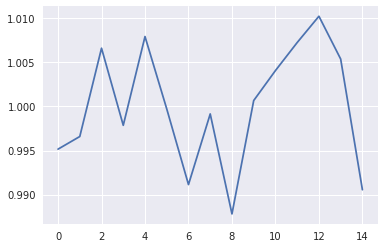

In [13]:
plt.plot(period_averages)
plt.show()

In [14]:
signal[8::8]

array([317.25    , 340.059998, 342.850006, 345.      , 334.769989,
       335.119995, 326.630005, 304.179993, 299.299988, 293.350006,
       293.899994, 305.019989, 275.01001 , 296.73999 , 357.720001,
       342.      , 318.51001 , 320.230011, 298.140015, 355.48999 ,
       321.640015, 288.950012, 295.200012, 309.579987, 250.559998,
       263.910004, 329.899994, 350.51001 , 338.190002, 359.700012,
       348.420013])

In [15]:
seasonal = np.tile(seasonal_mean(trended, freq), len(signal) // freq + 1)

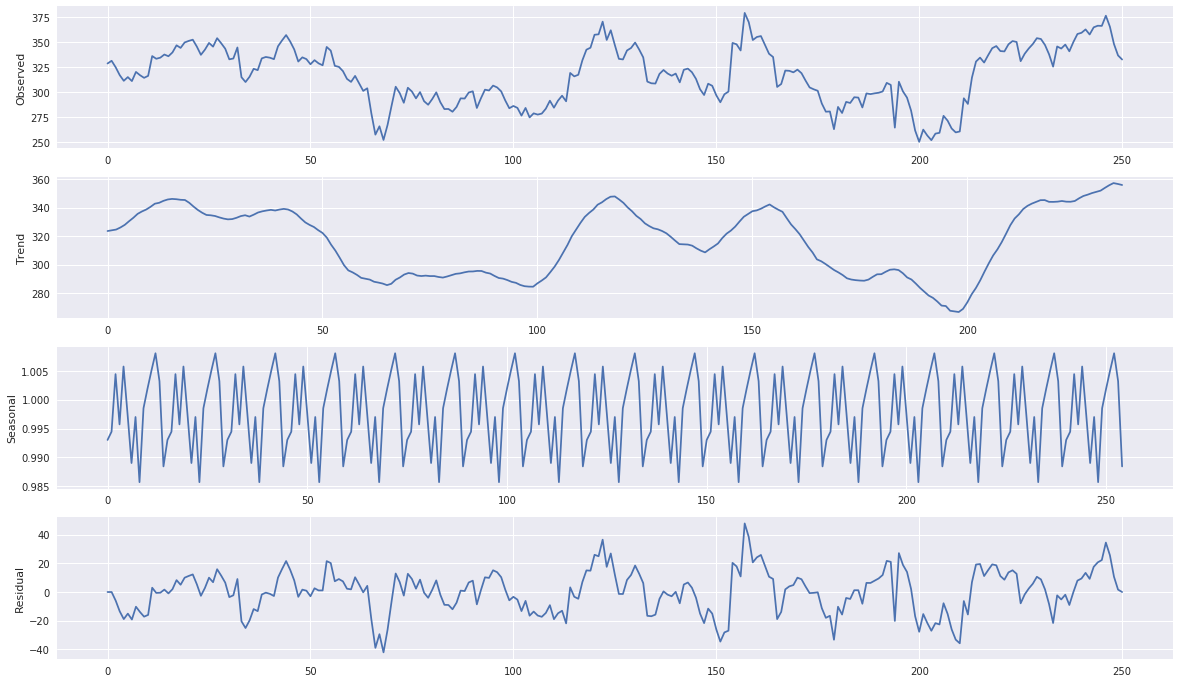

In [16]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20, 12))
ax1.plot(signal)
ax1.set_ylabel('Observed')
ax2.plot(output_conv)
ax2.set_ylabel('Trend')
ax3.plot(seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(noise)
ax4.set_ylabel('Residual')
plt.show()